In [95]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [27]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


I want to know if previous outcomes have an effect on current outcomes. I'm looking to see a percentage of yes and and no values grouped by previous outcomes.

In [47]:
df.groupby(['poutcome', 'y']).mean()#Nice to see but doesn't give the output that I'm looking for

age    duration  campaign       pdays  previous  \
poutcome    y                                                            
failure     no   39.626817  211.764464  2.028517  980.291198  1.139841   
            yes  41.871074  467.224793  1.864463  879.682645  1.342149   
nonexistent no   39.935167  221.565850  2.710567  999.000000  0.000000   
            yes  40.173193  623.688634  2.184973  999.000000  0.000000   
success     no   40.453027  241.175365  1.991649    5.624217  1.421712   
            yes  42.864653  363.680089  1.710291    5.568233  1.648770   

                 emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
poutcome    y                                                             
failure     no      -1.611489       93.052742     -43.337209   1.740383   
            yes     -2.131240       93.158255     -39.002645   1.112688   
nonexistent no       0.491993       93.672219     -40.300904   4.083050   
            yes     -0.808946       93.372055     -40.506304   2.669357   
success     no      -2.042589       93.165113     -39.477662   1.199499   
            yes     -2.117338       93.425035     -37.805034   0.887831   

                 nr.employed  
poutcome    y                 
failure     no   5099.794132  
            yes  5049.159504  
nonexistent no   5186.565289  
            yes  5125.858007  
success     no   5053.795198  
            yes  5018.206600

In [93]:
x = df.poutcome.value_counts()
j = df.groupby(['poutcome', 'y']).size()
print(x)
print(j)
plt()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
poutcome     y  
failure      no      3647
             yes      605
nonexistent  no     32422
             yes     3141
success      no       479
             yes      894
dtype: int64


In [112]:
prev_outcome = ['failure', 'success', 'nonexistent']
yes = [605/4252, 3141/35563, 894/1373]
no = [3647/4252, 479/1373, 32422/35563]

plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Percentage of Current Campaign Outcome')
plt.bar(prev_outcome, yes, alpha = .75, label ='Yes')
plt.bar(prev_outcome, no, alpha = .2, label = 'No')
plt.legend()

TypeError: 'str' object is not callable

<BarContainer object of 3 artists>

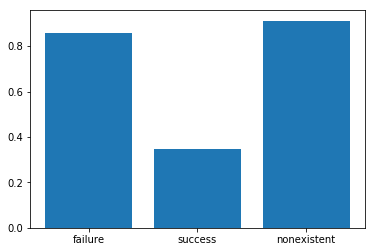

In [101]:
plt.bar(prev_outcome, no)

In [58]:
df['y'].value_counts(normalize=True)

KeyError: 'y'

In [ ]:
for i in df['y']:
    if i == no